#Exercise #3
* Run eigenfaces.py 
* Change the number of principal components to 200, 250 and 500. Explain the changes you observe in the reconstructed output.
* Read the PCA class/function in sklearn and tell the TAs the methods sklearn uses to find the eigenvectors and eigenvalues.
* Fill in the blank: in PCA, given data matrix X of shape n*d where n is the number of data points and d is the dimension of the data, we calculate eigenvectors and eigenvalues of M which is ________ of X.
* X is the input matrix with shape n*d where n is the number of data points and d is the dimension of the data. Lets assume Cov(X) = ATA and A = f(X). Find the function f to apply on X that gives you A. Cov(X) is the covariance matrix of X.
* Why do we sort eigenvalues and select eigenvectors in the decreasing order of eigenvalues.



In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
def plot_eigenfaces(num_of_pca_components):
  pca = PCA(num_of_pca_components).fit(faces.data)
  components = pca.transform(faces.data)
  projected = pca.inverse_transform(components)
  fig, ax = plt.subplots(2, 10, figsize=(20, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i in range(10):
      ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
      ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
      
  ax[0, 0].set_ylabel('full-dim\ninput')
  ax[1, 0].set_ylabel(f'{num_of_pca_components}-dim\nreconstruction');

  plt.show()


  fig, axes = plt.subplots(3, 8, figsize=(18, 8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
      ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

  plt.show()

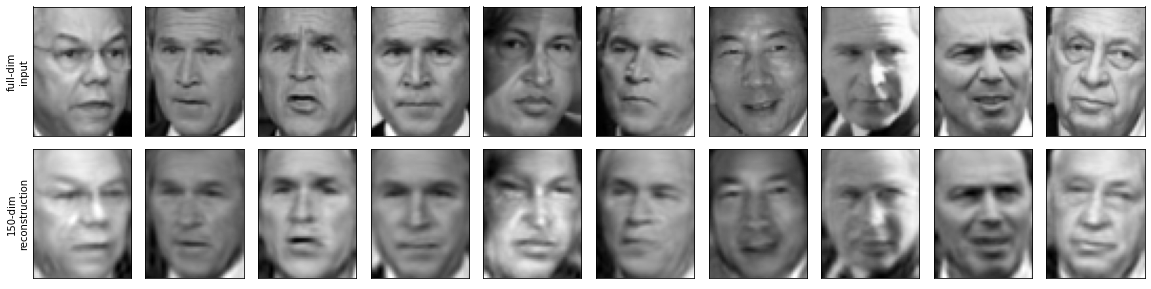

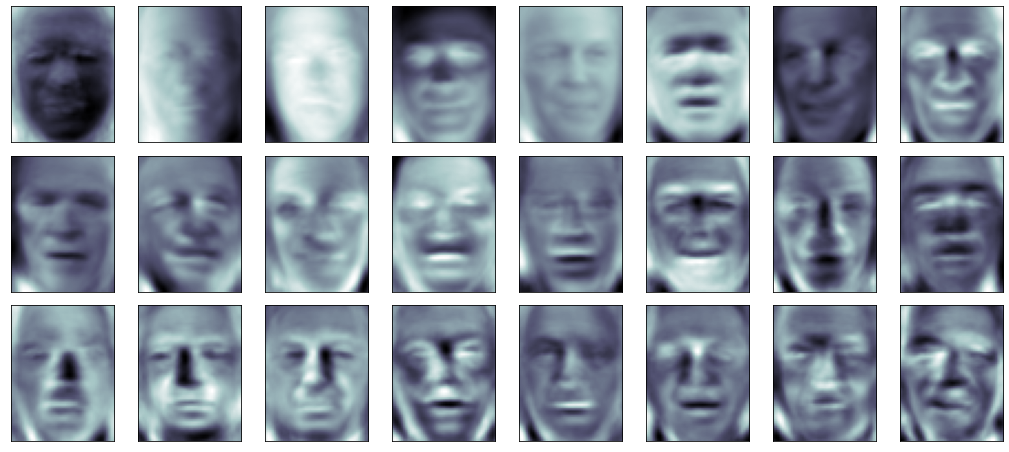

In [ ]:
plot_eigenfaces(150)

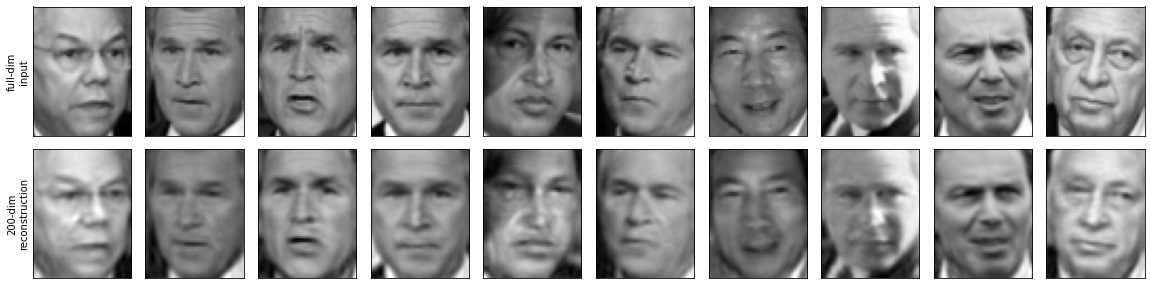

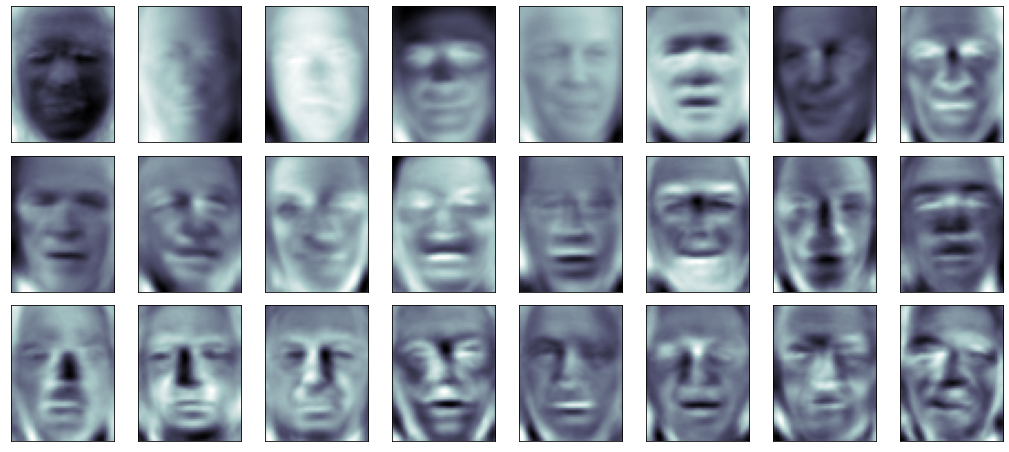

In [ ]:
plot_eigenfaces(200)

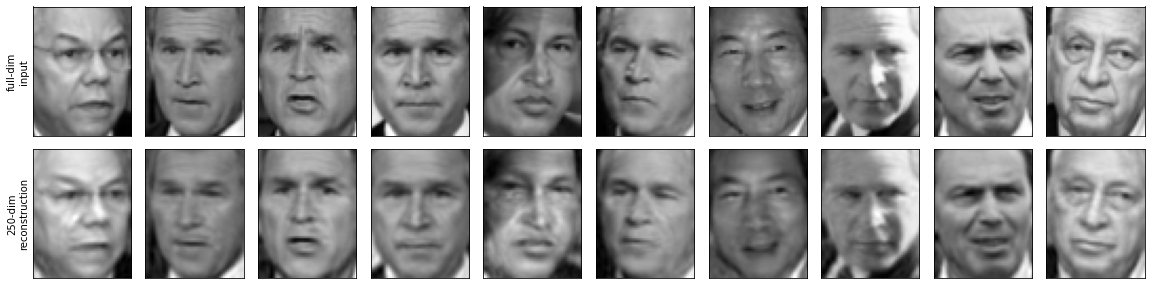

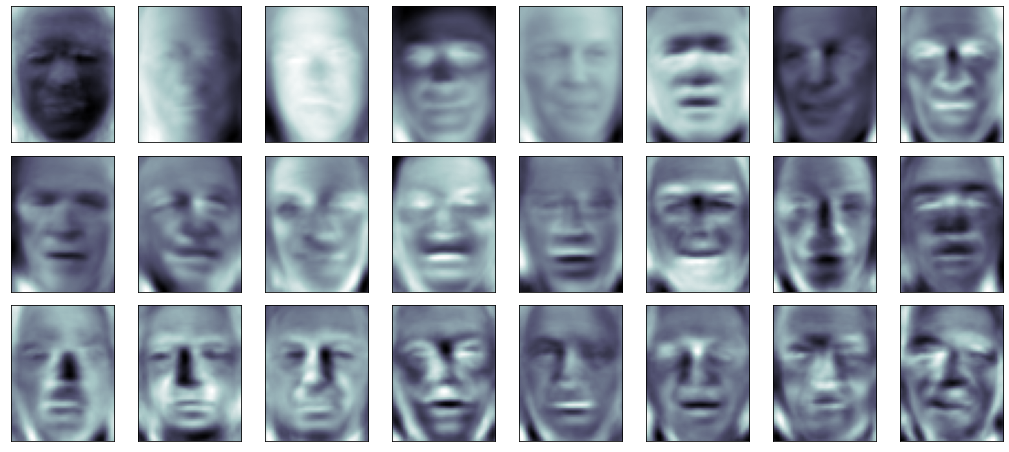

In [ ]:
plot_eigenfaces(250)

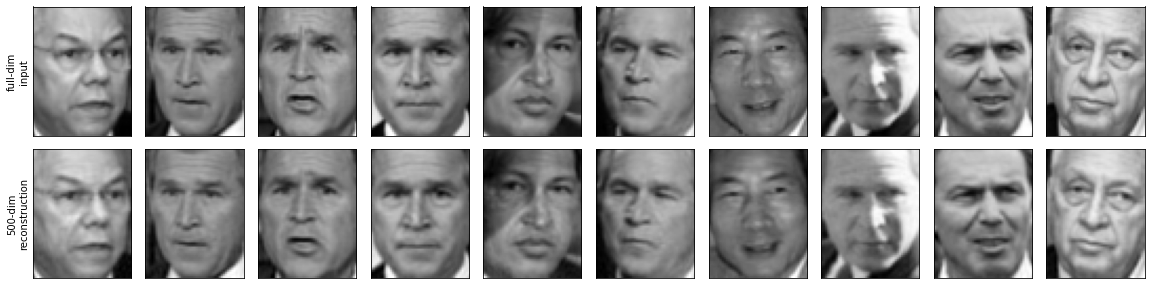

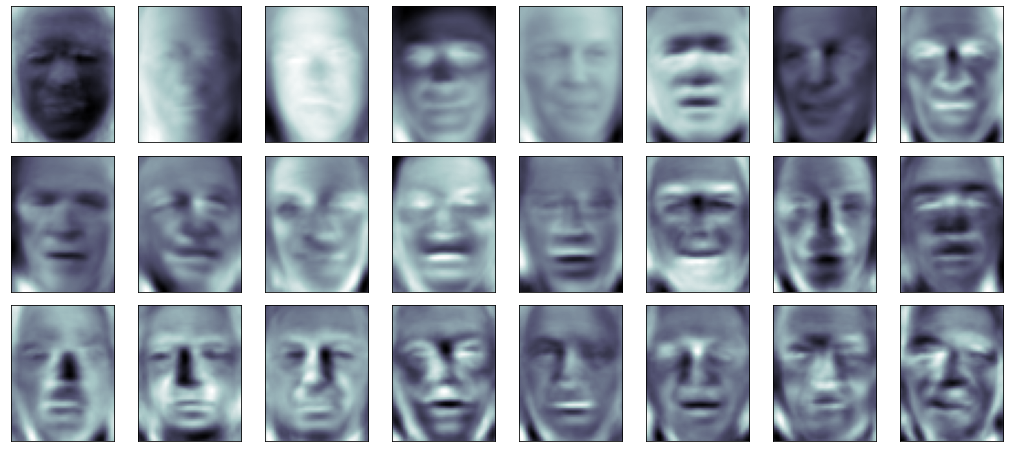

In [ ]:
plot_eigenfaces(500)

#Answers 
1. Change the number of principal components to 200, 250 and 500. Explain the changes you observe in the reconstructed output.

  **Ans: With a low number of principal components like 150, the reconstructed output appears to be blur. As the number of principal components increases, the reconstructed output becomes clearer and closer to how the full-dim input looks. This is because including more principal components mean that more information is captured, while on the contrary, a lower number of principal components relates to more loss of information, resulting in a reconstructed image that would look more generalized or blurry.**

2. Read the PCA class/function in sklearn and tell the TAs the methods sklearn uses to find the eigenvectors and eigenvalues.

  **Ans: sklearn finds the eigenvectors and eigenvalues by performing linear dimensionality reduction using Singular Value Decomposition of the data, projecting it into a lower dimensional space**

3. Fill in the blank: in PCA, given data matrix X of shape n*d where n is the number of data points and d is the dimension of the data, we calculate eigenvectors and eigenvalues of M which is ________ of X.

  **Ans: the covariance matrix**

4. X is the input matrix with shape n*d where n is the number of data points and d is the dimension of the data. Lets assume Cov(X) = ATA and A = f(X). Find the function f to apply on X that gives you A. Cov(X) is the covariance matrix of X.

  **Ans: The function f will be to take X - E[X] such that Cov(x) = (X - E[X])T(X - E[X])**

5. Why do we sort eigenvalues and select eigenvectors in the decreasing order of eigenvalues.

  **Ans: This is because the eigenvalues tells us how important is the information that the eigenvectors will contain about the distribution of the data. The eigenvectors with lower eigenvalues will have less important information captured about the distribution of data, and thus can be dropped without causing much loss of information.**

  **Therefore, by sorting in decreasing order, we would be able to pick the top few eigenvectors with higher eigenvalues, such that most important information about the distribution is retained, and a reconstructed image would still be recognizable even with reduced dimensionality.**

#Exercise #4
Assume we need to create a model that predicts the number of customers at a restaurant at any point of time. What kind of features should we extract?

**Ans: Time of day, day of the week, number of customers, number of staff, menu specials and cost of food.**